# CSCA-5642: Monet GAN Image Generation Project #
#### Develop a GAN neural network with a generator model and a discriminator model to generate 7000 to 10,000 images from an input set of 7000 photos. ####
    
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5642-week5/tree/main](https://github.com/alme9155/csca-5642-week5/tree/main)  

## I. Brief Description of the Project and Data ##

This project aims to create a generative adversarial network (GAN) that generates images resembling Monet's paintings.
- Submission will be evaluated by inception score MiFID(Memorization-informed Fréchet Inception Distance)
- MiFID score is a modification of Fréchet Inception Distance (FID).
- The smaller the MiFID value, the better the generated images will be. 

### Dataset: ####
* The dataset contains 4 data directories: "monet_tfrec", "photo_tfrec", "monet_jpg", "photo_jpg"
* The monet_tfrec and monet_jpg directories contain the same painting images
* The photo_tfrec and photo_jpg directories contain the same photos.

|Directory        | Dimension      | Size      | Structure   |
|:----------------|----------------|:----------|:-----------:|
| monet_tfrec | 300   | 256x256 | JPEG |
| photo_tfrec | 300   | 256x256 | JPEG |
| monet_jpg   | 7028  | 256x256 | JPEG |
| photo_jpg   | 7028  | 256x256 | JPEG |


### Competition Rules ###
* Create an Images.zip that contains 7,000-10,000 images sized 256x256.

## II. Exploratory Data Analysis (EDA) ##
- Review the total number of monet paintings in tref format (File Count)
- Review the total number of photos in tfref format (File Count)
- Inspect image dimension (width x height) of monets paintings
- Inspect image dimension (width x height) of photos
- Display sample monet paints and photos

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under t 4ehe input directory

import os

jpg_file_count =0
tfrec_file_count = 0

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"[{dirname}]")

    for filename in filenames:
        if filename.endswith('.jpg'):
            jpg_file_count +=1
            if jpg_file_count < 3:
                print("\t"+os.path.join(dirname, filename))
            elif jpg_file_count == 3:
                print("\t...")
        elif filename.endswith('.tfrec'):
            tfrec_file_count +=1
            if tfrec_file_count < 3:
                print("\t"+os.path.join(dirname, filename))
            elif tfrec_file_count == 3:
                print("\t...")
        else:        
            print(os.path.join(dirname, filename))
    if jpg_file_count > 0:
        print(f"\n\tTotal number of .jpg files in {dirname}: {jpg_file_count}")
        jpg_file_count =0
    if tfrec_file_count > 0:
        print(f"\n\tTotal number of .tfrec files in {dirname}: {tfrec_file_count}")
        tfrec_file_count =0
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[/kaggle/input]
[/kaggle/input/gan-getting-started]
[/kaggle/input/gan-getting-started/monet_jpg]
	/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
	/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
	...

	Total number of .jpg files in /kaggle/input/gan-getting-started/monet_jpg: 300
[/kaggle/input/gan-getting-started/photo_tfrec]
	/kaggle/input/gan-getting-started/photo_tfrec/photo12-352.tfrec
	/kaggle/input/gan-getting-started/photo_tfrec/photo11-352.tfrec
	...

	Total number of .tfrec files in /kaggle/input/gan-getting-started/photo_tfrec: 20
[/kaggle/input/gan-getting-started/photo_jpg]
	/kaggle/input/gan-getting-started/photo_jpg/fb97febc5f.jpg
	/kaggle/input/gan-getting-started/photo_jpg/c54c5368af.jpg
	...

	Total number of .jpg files in /kaggle/input/gan-getting-started/photo_jpg: 7038
[/kaggle/input/gan-getting-started/monet_tfrec]
	/kaggle/input/gan-getting-started/monet_tfrec/monet12-60.tfrec
	/kaggle/input/gan-getting-started/monet_tfrec/monet16-60.tfrec


Showing 5 random Photo images:


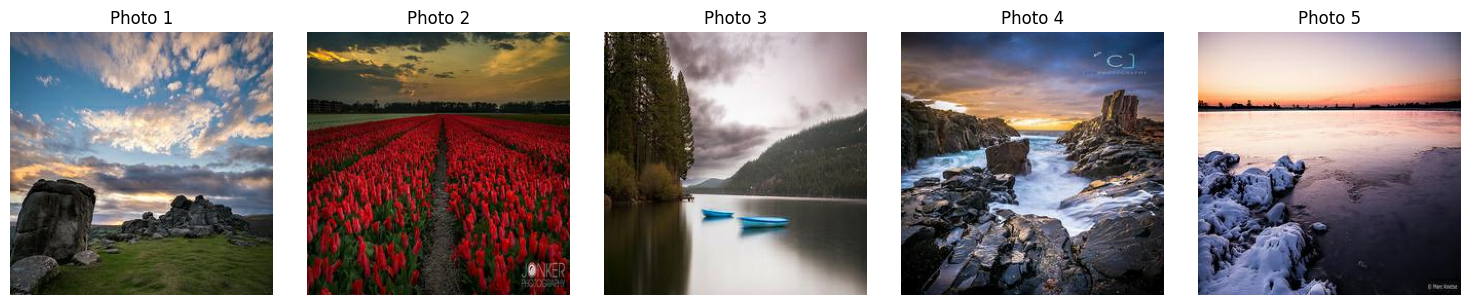

Showing 5 random Monet paintings:


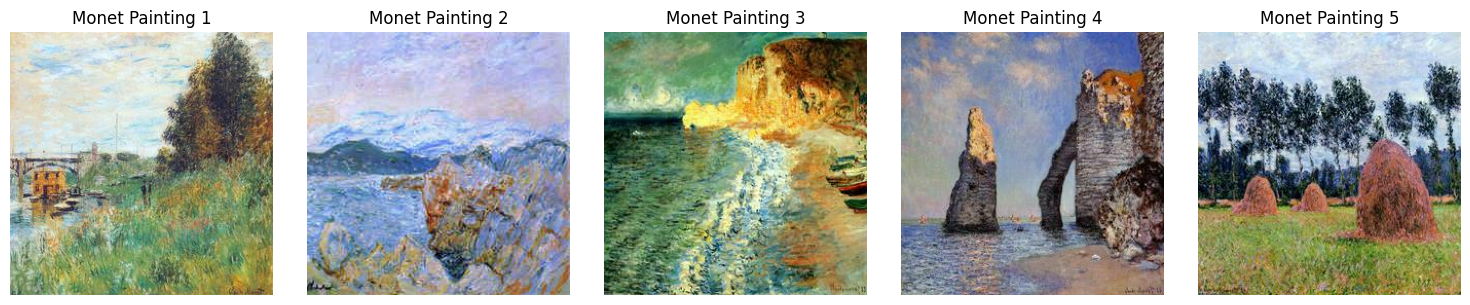

In [7]:
# Display sample files
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from kaggle_datasets import KaggleDatasets

INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

# Show five random photo images
def show_random_photos(folder, label, n=5):
    sample_files = random.sample(os.listdir(folder), n)
    plt.figure(figsize=(15, 3))
    for i, file in enumerate(sample_files):
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{label} {i+1}")
    plt.tight_layout()
    plt.show()


# Run both
print("Showing 5 random Photo images:")
show_random_photos(photo_jpg_dir, 'Photo', n=5)
print("Showing 5 random Monet paintings:")
show_random_photos(monet_jpg_dir, 'Monet Painting', n=5)


In [3]:
# examine images in data directories
import os
import cv2
from PIL import Image

# data directory
INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_jpg_dir = os.path.join(INPUT_DIR, 'monet_jpg')
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_jpg_dir = os.path.join(INPUT_DIR, 'photo_jpg')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

EXPECTED_SIZE = (256, 256)
EXPECTED_MODE = "RGB"  
PIXEL_RANGE = (-1.0, 1.0)

def examine_files(image_dir):
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_dir, filename)
            with Image.open(img_path) as img:
                # Check size and mode
                if img.size != EXPECTED_SIZE or img.mode != EXPECTED_MODE:
                    print("Needs resizing and preprocessing:")
                    print(f"File: {filename}")
                    print(f"Size: {img.size}, Mode: {img.mode}")
                    break
                    
                image_np = np.asarray(img).astype(np.float32)
                image_np = (image_np / 127.5) - 1.0 
                
                # Check pixel range
                if not (np.min(image_np) >= -1.0 and np.max(image_np) <= 1.0):
                    print("Pixel values in {filename} out of range [-1, 1]:")
                    print(f"File: {filename}")
                    print(f"Pixel min: {np.min(image_np)}, max: {np.max(image_np)}")
                    break
    else:
        print(f"All images in {image_dir} are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]")
        print(f"No further data pre-processing is required for {image_dir}")

examine_files(monet_jpg_dir)
examine_files(photo_jpg_dir)


All images in /kaggle/input/gan-getting-started/monet_jpg are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]
No further data pre-processing is required for /kaggle/input/gan-getting-started/monet_jpg
All images in /kaggle/input/gan-getting-started/photo_jpg are (Dimension) 256×256, (Channel) RGB, and pixel range to [-1, 1]
No further data pre-processing is required for /kaggle/input/gan-getting-started/photo_jpg


### Brief Conclusion of EDA ###

* All image files in the corresponding image directory are already normalized to the required output dimensions 256x256x3 channels.
* No further pre-processing is required before applying an adversarial generative neural network.
  - [ monet_tfrec ] : 300 Monet paintings sized 256x256 with RGB channels in JPEG format
  - [ photo_tfrec ]: 300 Monet paintings sized 256x256 with RGB channels in TFRecord format
  - [ monet_jpg ] : 7028 photos sized 256x256 with RGB channels in JPEG format
  - [ photo_jpg ] : 7028 photos sized 256x256 with RGB channels in TFRecord format

## III. Generative Neural Network Architecture: CycleGAN ##

### Model Description ###
- Following the tutorial on the Kaggle completion, I have decided to use the CycleGAN architecture for this project.
- CycleGAN is a dual DCGAN design (Deep Convolution GAN) to deploy two generators and two discriminators.
- This bi-directional setup will enable translation between domains: A-> B and B -> A.
- - Key Components of CycleGAN are to deploy two generators and two discriminators in the setup.
  - Two Generators:
      - G: X -> Y (e.g., Photo → Monet)
      - F: Y -> X (e.g., Monet → Photo)
  - Two Discriminators:
      - D_Y distinguish real Y from fake Y (G(X)) (e.g. real Monet)
      - D_X distinguish real X from fake X (F(Y)) (e.g. real Photo)
  - By applying a cycle-consistency constraint, it ensures the generated image not only carries Monet's impressionistic style but also looks realistic.
  - Otherwise, the generated image of a zebra might have an extra limb

Ref: [https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook](https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook)

In [ ]:
# CycleGAN class definition
import tensorflow as tf
from tensorflow.keras import layers, optimizers
import time

class CycleGAN(tf.keras.Model):
    def __init__(self, img_size=256, lambda_cycle=10):
        super(CycleGAN, self).__init__()
        self.img_size = img_size
        self.lambda_cycle = lambda_cycle
        self.loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)     
        self.build_models()
        self.gen_learning_rate=2e-4
        self.disc_learning_rate=2e-4
        print('CycleGAN::Init() complete.')

    def residual_block(self, filters):
        return [
            layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False),
            layers.BatchNormalization()
        ]
    
    def build_generator(self):
        # kernel size: 256 x 256 x RGB channel
        inputs = tf.keras.layers.Input(shape=[self.img_size, self.img_size, 3])
        x = inputs

        # down stack
        for layer in [
            layers.Conv2D(64, 4, strides=2, padding='same', use_bias=False),
            layers.LeakyReLU(),
            layers.Conv2D(128, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(256, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
        ]:
            x = layer(x)

        # residual block
        for _ in range(6):
            res = x
            for layer in self.residual_block(256):
                res = layer(res)
            x = layers.Add()([x, res])

        # up stack
        for layer in [
            layers.Conv2DTranspose(128, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2DTranspose(64, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
        ]:
            x = layer(x)

        #last output
        x = tf.keras.layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(x)
        return tf.keras.Model(inputs=inputs, outputs=x)

    def build_discriminator(self):
        # discriminator only has down stack with final output
        inputs = layers.Input(shape=[self.img_size, self.img_size, 3])
        x = inputs

        # down stack
        for layer in [
            layers.Conv2D(64, 4, strides=2, padding='same', use_bias=False),
            layers.LeakyReLU(),
            layers.Conv2D(128, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(256, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(512, 4, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.LeakyReLU(),
            layers.Conv2D(1, 4, strides=1, padding='same') # Outputs BinaryCrossentropy(from_logits=True).
        ]:
            x = layer(x)            
        return tf.keras.Model(inputs=inputs, outputs=x)

    def build_models(self):
        self.gen_photo_to_monet = self.build_generator()
        self.gen_monet_to_photo = self.build_generator()
        self.disc_photo = self.build_discriminator()
        self.disc_monet = self.build_discriminator()

    def generator_loss(self, discriminator_output):
        return self.loss_obj(tf.ones_like(discriminator_output), discriminator_output)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.loss_obj(tf.ones_like(real_output), real_output)
        fake_loss = self.loss_obj(tf.zeros_like(fake_output), fake_output)
        return (real_loss + fake_loss) * 0.5

    
    def compile(self, gen_learning_rate=None, disc_learning_rate=None):
        super().compile()
        gen_lr = gen_learning_rate if gen_learning_rate is not None else self.gen_learning_rate
        disc_lr = disc_learning_rate if disc_learning_rate is not None else self.disc_learning_rate
        self.gen_photo_to_monet_optimizer = optimizers.Adam(gen_lr, beta_1=0.5)
        self.gen_monet_to_photo_optimizer = optimizers.Adam(gen_lr, beta_1=0.5)
        self.disc_photo_optimizer = optimizers.Adam(disc_lr, beta_1=0.5)
        self.disc_monet_optimizer = optimizers.Adam(disc_lr, beta_1=0.5)          
        print('CycleGAN::compile() complete.')

    @tf.function
    def train_step(self, batch_data):
        real_photo, real_monet = batch_data

        with tf.GradientTape(persistent=True) as tape:
            # Generate images
            fake_monet = self.gen_photo_to_monet(real_photo, training=True)
            fake_photo = self.gen_monet_to_photo(real_monet, training=True)
            cycled_photo = self.gen_monet_to_photo(fake_monet, training=True)
            cycled_monet = self.gen_photo_to_monet(fake_photo, training=True)
            same_photo = self.gen_monet_to_photo(real_photo, training=True)
            same_monet = self.gen_photo_to_monet(real_monet, training=True)

            # Discriminator outputs
            disc_real_photo = self.disc_photo(real_photo, training=True)
            disc_fake_photo = self.disc_photo(fake_photo, training=True)
            disc_real_monet = self.disc_monet(real_monet, training=True)
            disc_fake_monet = self.disc_monet(fake_monet, training=True)

            # Generator losses
            gen_photo_to_monet_loss = self.generator_loss(disc_fake_monet)
            gen_monet_to_photo_loss = self.generator_loss(disc_fake_photo)
            cycle_loss = tf.reduce_mean(tf.abs(real_photo - cycled_photo)) + tf.reduce_mean(tf.abs(real_monet - cycled_monet))
            identity_loss = tf.reduce_mean(tf.abs(real_photo - same_photo)) + tf.reduce_mean(tf.abs(real_monet - same_monet))

            total_gen_photo_to_monet_loss = gen_photo_to_monet_loss + self.lambda_cycle * cycle_loss + 0.5 * self.lambda_cycle * identity_loss
            total_gen_monet_to_photo_loss = gen_monet_to_photo_loss + self.lambda_cycle * cycle_loss + 0.5 * self.lambda_cycle * identity_loss

            # Discriminator losses
            disc_photo_loss = self.discriminator_loss(disc_real_photo, disc_fake_photo)
            disc_monet_loss = self.discriminator_loss(disc_real_monet, disc_fake_monet)

        # Gradients
        grads_gen_photo_to_monet = tape.gradient(total_gen_photo_to_monet_loss, self.gen_photo_to_monet.trainable_variables)
        grads_gen_monet_to_photo = tape.gradient(total_gen_monet_to_photo_loss, self.gen_monet_to_photo.trainable_variables)
        grads_disc_photo = tape.gradient(disc_photo_loss, self.disc_photo.trainable_variables)
        grads_disc_monet = tape.gradient(disc_monet_loss, self.disc_monet.trainable_variables)

        # Clip gradients
        grads_gen_photo_to_monet = [tf.clip_by_norm(g, 1.0) for g in grads_gen_photo_to_monet]
        grads_gen_monet_to_photo = [tf.clip_by_norm(g, 1.0) for g in grads_gen_monet_to_photo]
        grads_disc_photo = [tf.clip_by_norm(g, 1.0) for g in grads_disc_photo]
        grads_disc_monet = [tf.clip_by_norm(g, 1.0) for g in grads_disc_monet]

        # Apply gradients
        self.gen_photo_to_monet_optimizer.apply_gradients(zip(grads_gen_photo_to_monet, self.gen_photo_to_monet.trainable_variables))
        self.gen_monet_to_photo_optimizer.apply_gradients(zip(grads_gen_monet_to_photo, self.gen_monet_to_photo.trainable_variables))
        self.disc_photo_optimizer.apply_gradients(zip(grads_disc_photo, self.disc_photo.trainable_variables))
        self.disc_monet_optimizer.apply_gradients(zip(grads_disc_monet, self.disc_monet.trainable_variables))

        del tape
        return {
            'gen_photo_to_monet_loss': total_gen_photo_to_monet_loss,
            'gen_monet_to_photo_loss': total_gen_monet_to_photo_loss,
            'disc_photo_loss': disc_photo_loss,
            'disc_monet_loss': disc_monet_loss
        }

    def fit(self, photo_dataset, monet_dataset, epochs=20):
        for epoch in range(epochs):
            start = time.time()
            for image_photo, image_monet in tf.data.Dataset.zip((photo_dataset, monet_dataset)):
                self.train_step((image_photo, image_monet))
            print(f"Epoch {epoch+1} completed in {time.time() - start:.2f}s")
        print("CycleGAN::Training() complete.")

## IV. Traing CycleGAN Model and Generate Output ##

* Load Monet and Photo Dataset
* Train CycleGAN model with loaded dataset
* Generate 10 Sample monet painting 
Ref: [https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook](https://www.kaggle.com/code/amyjang/monet-cyclegan-tutorial/notebook)

In [13]:
# load dataset
import tensorflow as tf
from kaggle_datasets import KaggleDatasets
import os

IMAGE_SIZE = [256, 256]
BATCH_SIZE = 1

# Get GCS path for TFRecord data
GCS_PATH = KaggleDatasets().get_gcs_path('gan-getting-started')

INPUT_DIR = "/kaggle/input/gan-getting-started"
monet_tfrec_dir = os.path.join(INPUT_DIR, 'monet_tfrec')
photo_tfrec_dir = os.path.join(INPUT_DIR, 'photo_tfrec')

# Use it in TFRecordDataset for TPU
monet_tfrec_paths = tf.io.gfile.glob(monet_tfrec_dir + '/*.tfrec')
monet_dataset = tf.data.TFRecordDataset(monet_tfrec_paths)
photo_tfrec_paths = tf.io.gfile.glob(photo_tfrec_dir + '/*.tfrec')
photo_dataset = tf.data.TFRecordDataset(photo_tfrec_paths)


def load_dataset(tfrecord_paths):
    return (tf.data.TFRecordDataset(tfrecord_paths)
            .map(parse_tfrecord, num_parallel_calls=tf.data.AUTOTUNE)
            .cache()
            .shuffle(1024)
            .batch(BATCH_SIZE)
            .prefetch(tf.data.AUTOTUNE))


monet_dataset = load_dataset(monet_paths)
photo_dataset = load_dataset(photo_paths)


In [ ]:
import tensorflow as tf
import os
import zipfile
import shutil
import numpy as np
import PIL.Image
import random
import matplotlib.pyplot as plt

IMG_SIZE = 256
EPOCHS = 25
OUTPUT_DIR = "../generated_images"

model = CycleGAN(img_size=IMG_SIZE)
model.compile()
history = model.fit(photo_dataset, monet_dataset, epochs=EPOCHS)

# Remove output directory if it exists.
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Randomly pick 10 generated images, and display generated images side by side with original photos
i = 1
for photo in photo_dataset.unbatch().take(10):
    input_img = tf.expand_dims(photo, axis=0)  
    generated = model.gen_photo_to_monet(input_img, training=False)[0]
    
    original_img = (photo.numpy() * 127.5 + 127.5).astype(np.uint8)
    generated_img = (generated.numpy() * 127.5 + 127.5).astype(np.uint8)
    PIL.Image.fromarray(generated_img).save(os.path.join(OUTPUT_DIR, f"{i}.jpg"))
    
    # Display images side by side
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original Photo")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(generated_img)
    plt.title("Generated Monet")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    i += 1


In [ ]:
import tensorflow as tf
import os
import zipfile
import shutil

OUTPUT_ZIPFILE = "images.zip"
TMP_DIR = "../tmp"
NUM_IMAGES = 7000 

# Clean up temporary directory if used
# if os.path.exists(TMP_DIR):
#     shutil.rmtree(TMP_DIR)

#Generate zip file
with zipfile.ZipFile(OUTPUT_ZIPFILE, "w", compression=zipfile.ZIP_DEFLATED) as z:
    i = 1
    for photo_batch in photo_dataset.repeat().take(NUM_IMAGES):  # Repeat dataset to generate enough images
        generated = model.gen_photo_to_monet(photo_batch, training=False)
        for img in generated:
            if i > NUM_IMAGES:
                break
            img = (img.numpy() * 127.5 + 127.5).astype(np.uint8)
            im = PIL.Image.fromarray(img)
            # Save image to bytes buffer
            buffer = io.BytesIO()
            im.save(buffer, format="JPEG")
            # Write to zip file
            z.writestr(f"image_{i}.jpg", buffer.getvalue())
            i += 1



In [ ]:
# # save trained model.
# model.gen_photo_to_monet.save(os.path.join(OUTPUT_DIR, "gen_photo_to_monet"))
# model.gen_monet_to_photo.save(os.path.join(OUTPUT_DIR, "gen_monet_to_photo"))

# # Zip saved_model.pb from both generators
# with zipfile.ZipFile("cyclegan_models.zip", "w") as z:
#     z.write(os.path.join(OUTPUT_DIR, "gen_photo_to_monet", "saved_model.pb"),
            
#     z.write(os.path.join(OUTPUT_DIR, "gen_monet_to_photo", "saved_model.pb"),
#             arcname="gen_photo_to_monet/saved_monet_to_photo_model.pb")
